In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [2]:
# Load the dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv'
column_names = [
    'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness',
    'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'
]
data = pd.read_csv(url, names=column_names)

# Replace zero values in specific columns with NaN
columns_with_zeros = [
    'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI'
]
data[columns_with_zeros] = data[columns_with_zeros].replace(0, np.nan)

# Fill NaN values with the mean of the column
data.fillna(data.mean(), inplace=True)

# Separate features and target variable
X = data.drop('Outcome', axis=1)
y = data['Outcome']

# Standardize the feature variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Check the first few rows of the data
data.head()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,155.548223,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,155.548223,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,155.548223,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168.000000,43.1,2.288,33,1


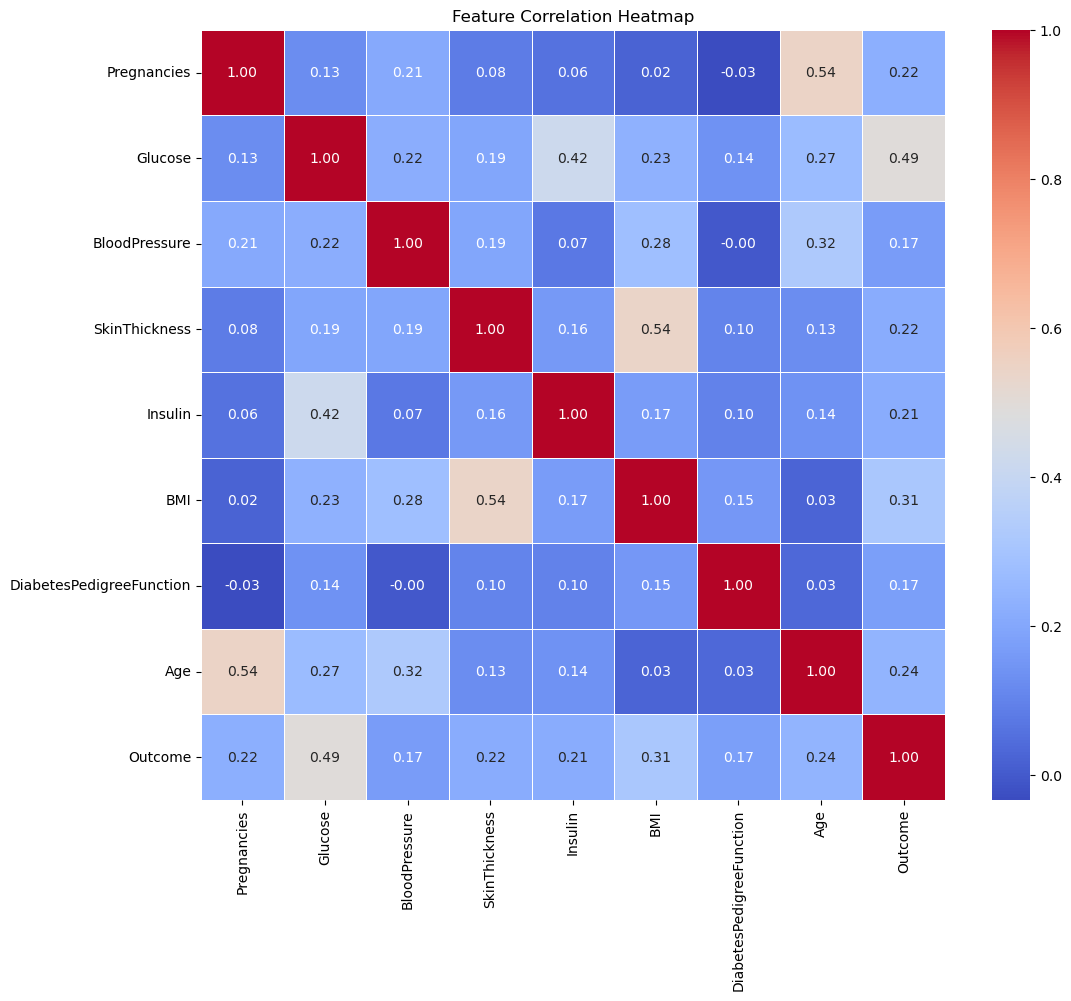

In [3]:
# Compute correlation matrix
correlation_matrix = data.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


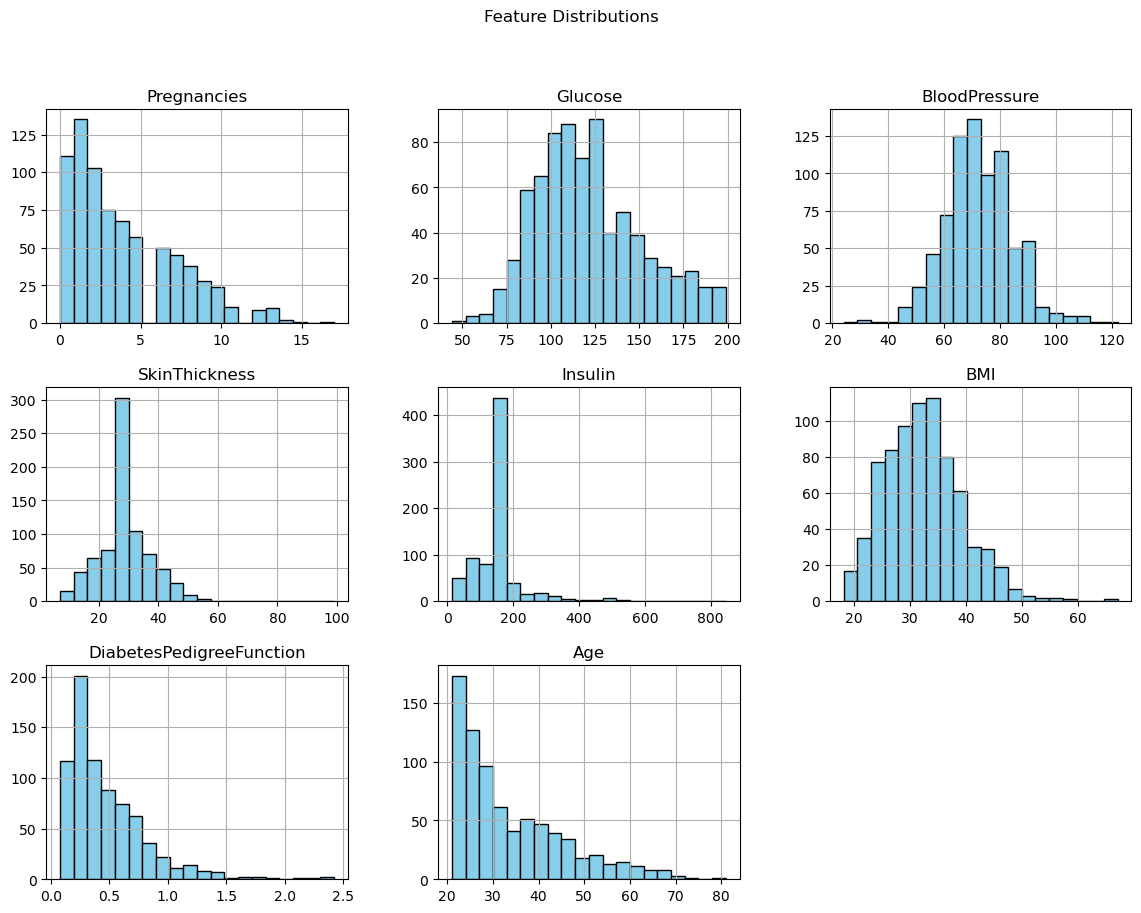

In [4]:
# Plot histograms for all features
data.drop('Outcome', axis=1).hist(figsize=(14, 10), bins=20, color='skyblue', edgecolor='black')
plt.suptitle('Feature Distributions')
plt.show()


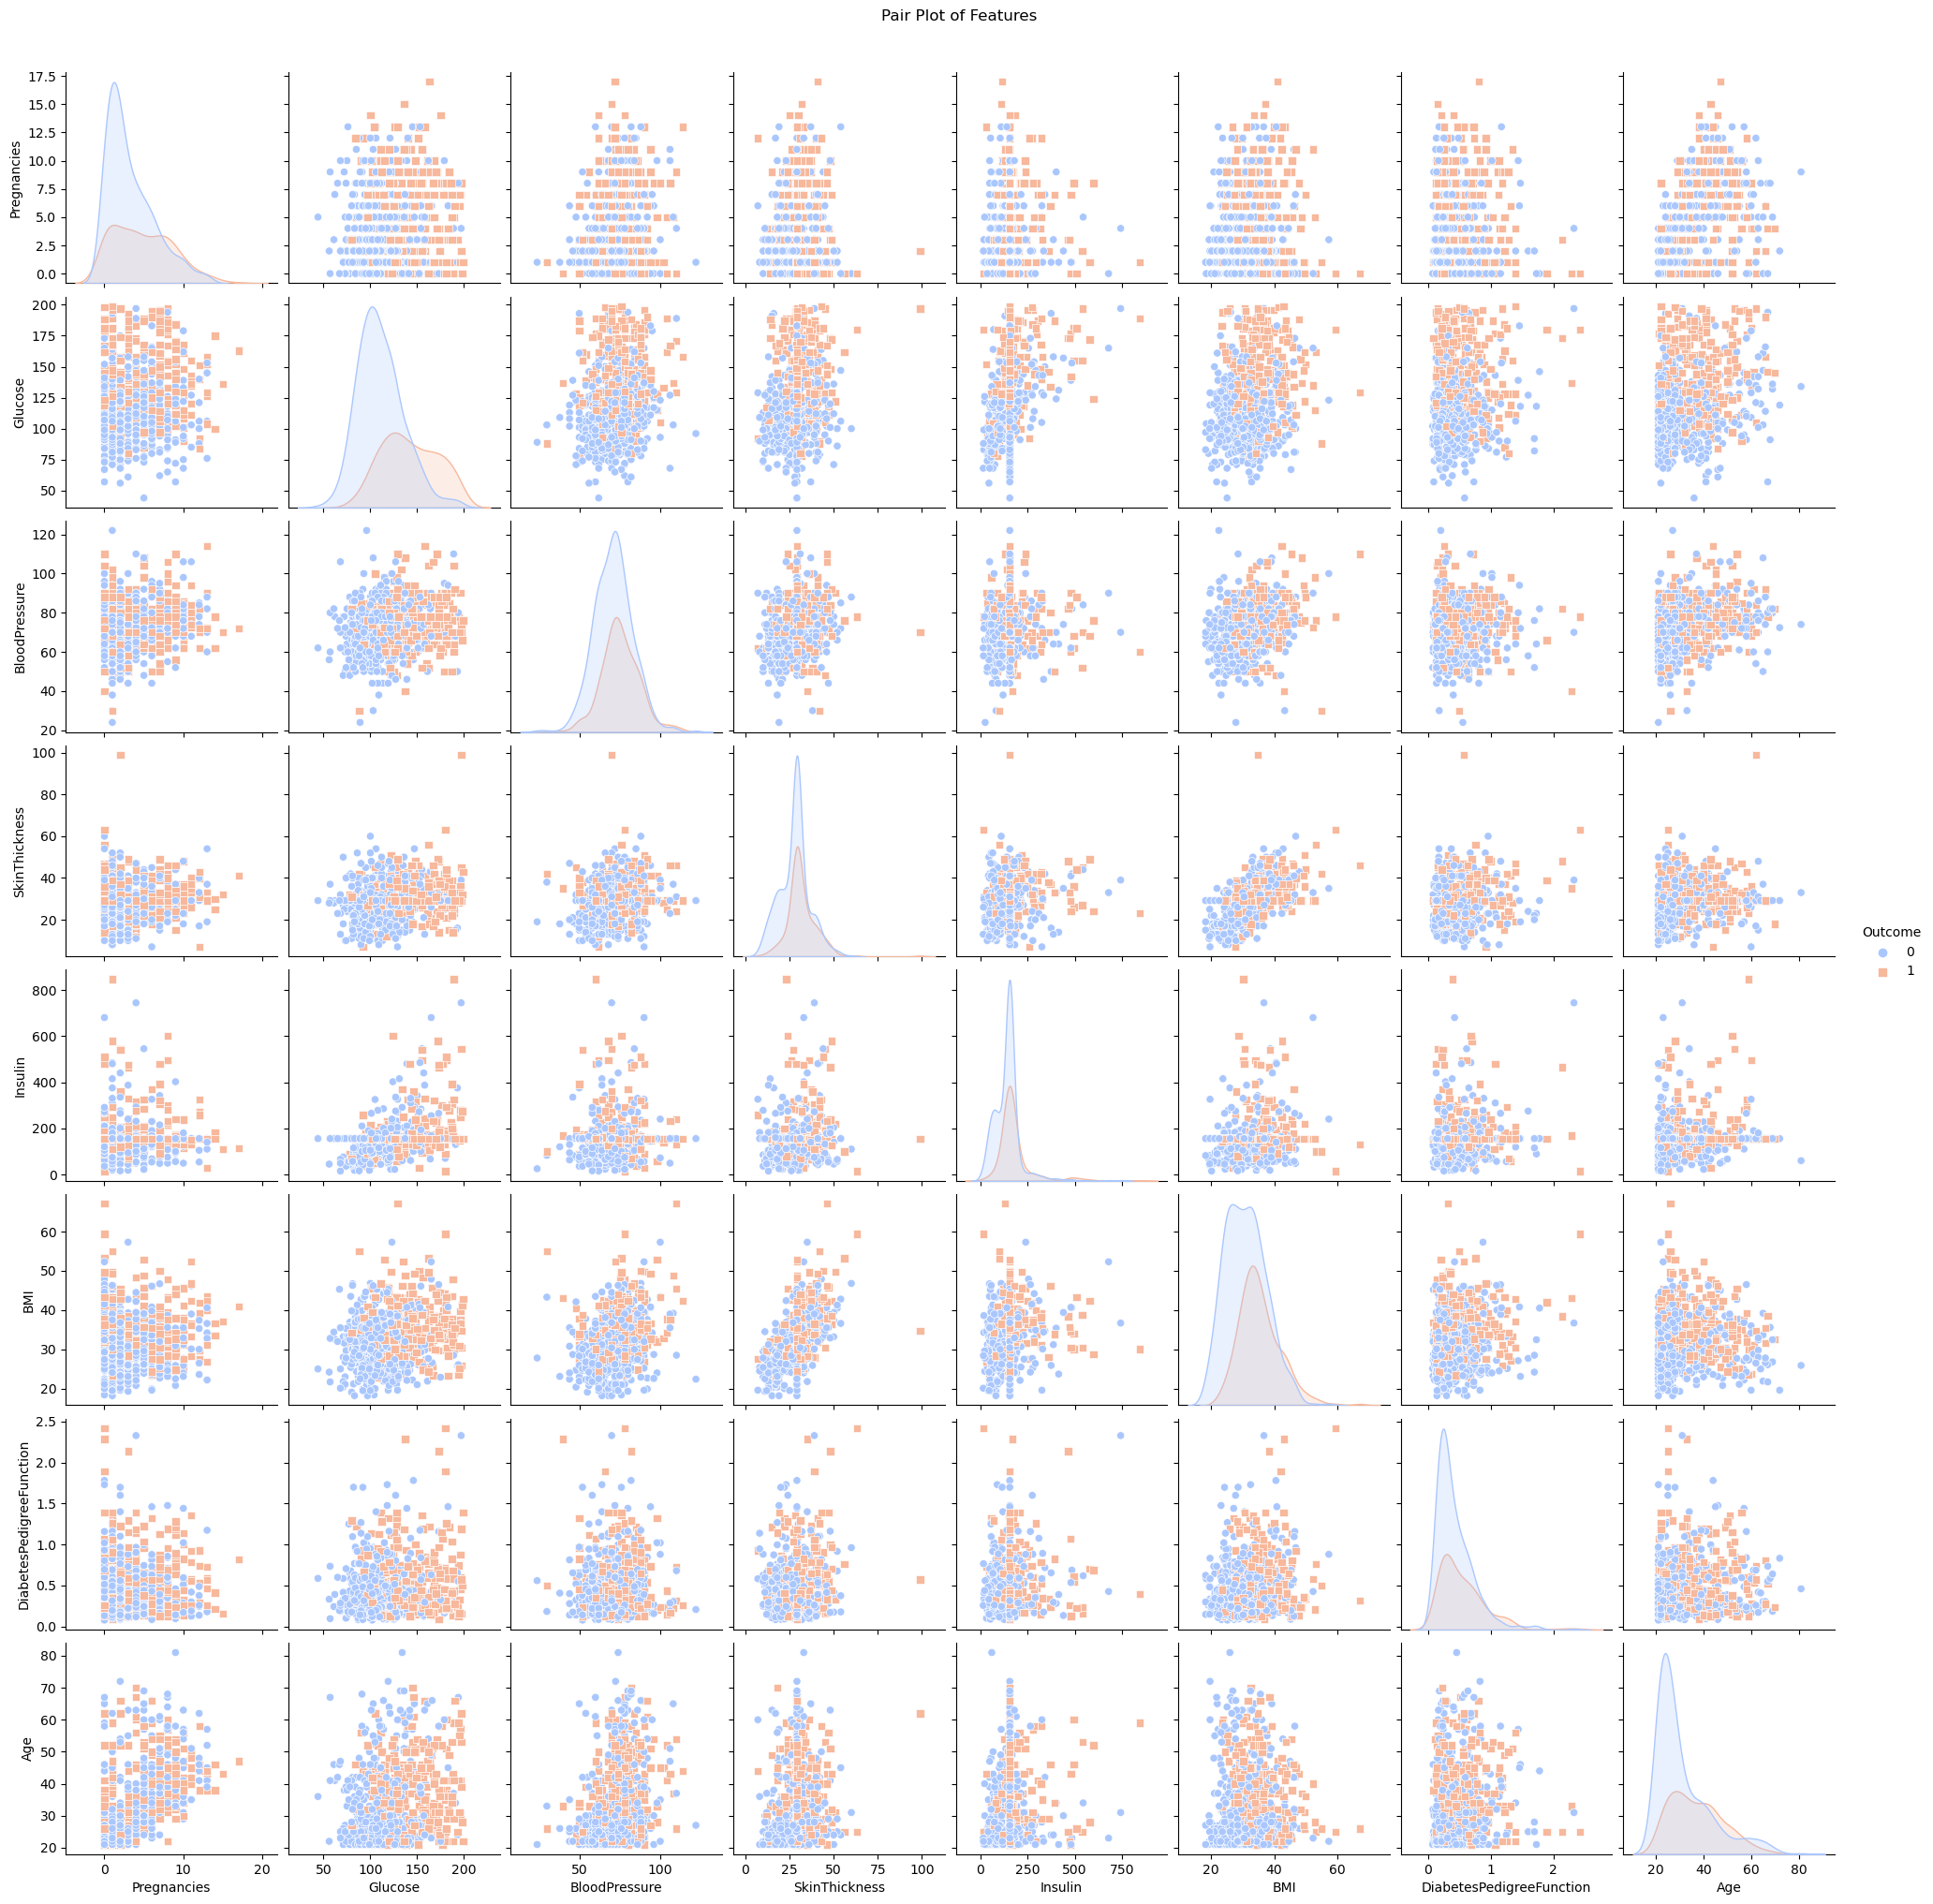

In [5]:
# Plot pair plot
sns.pairplot(data, hue='Outcome', palette='coolwarm', markers=["o", "s"])
plt.suptitle('Pair Plot of Features', y=1.02)
plt.show()


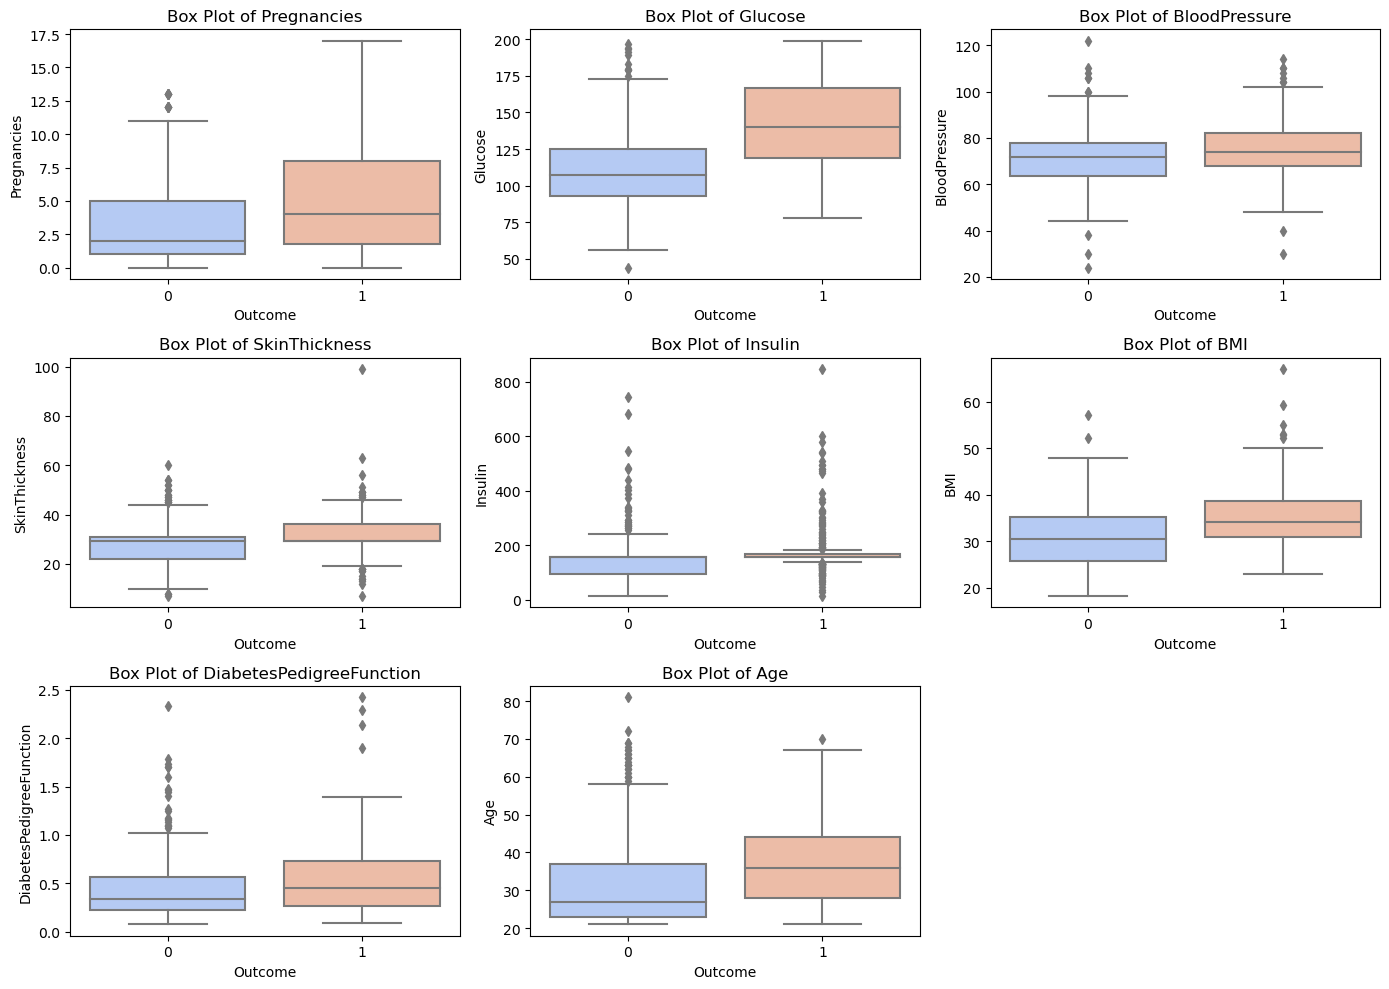

In [6]:
# Plot box plots for features
plt.figure(figsize=(14, 10))
for i, column in enumerate(X.columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x='Outcome', y=column, data=data, palette='coolwarm')
    plt.title(f'Box Plot of {column}')
plt.tight_layout()
plt.show()


In [7]:
# Initialize and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Make predictions
knn_pred = knn_model.predict(X_test)

# Evaluate the model
knn_accuracy = accuracy_score(y_test, knn_pred)
print(f"KNN Accuracy: {knn_accuracy * 100:.2f}%")
print("\nClassification Report for KNN:")
print(classification_report(y_test, knn_pred))


KNN Accuracy: 74.03%

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.83      0.75      0.79        99
           1       0.62      0.73      0.67        55

    accuracy                           0.74       154
   macro avg       0.72      0.74      0.73       154
weighted avg       0.75      0.74      0.74       154



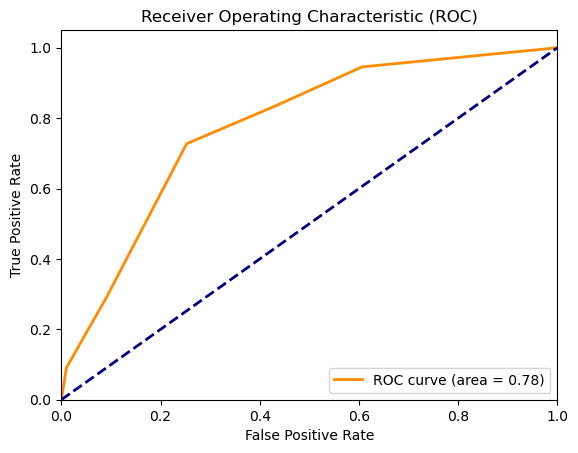

In [8]:
# Compute ROC curve
fpr, tpr, _ = roc_curve(y_test, knn_model.predict_proba(X_test)[:,1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()


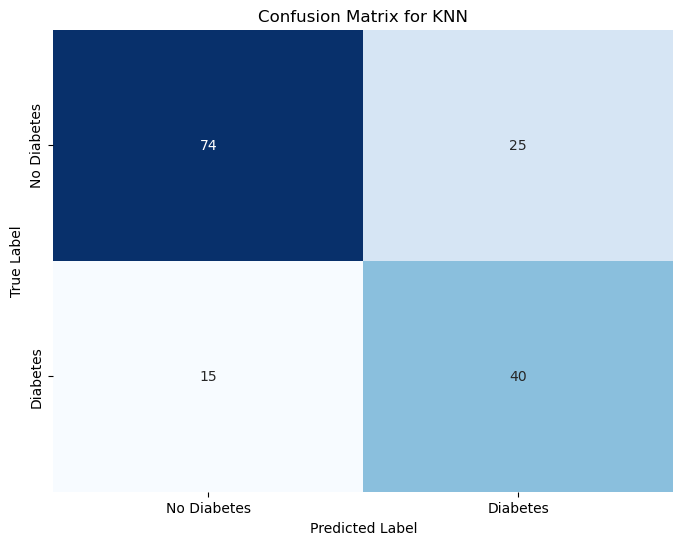

In [9]:
# Compute confusion matrix
cm = confusion_matrix(y_test, knn_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for KNN')
plt.show()


In [10]:
# Initialize and train the Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Make predictions
dt_pred = dt_model.predict(X_test)

# Evaluate the model
dt_accuracy = accuracy_score(y_test, dt_pred)
print(f"Decision Tree Accuracy: {dt_accuracy * 100:.2f}%")
print("\nClassification Report for Decision Tree:")
print(classification_report(y_test, dt_pred))


Decision Tree Accuracy: 72.08%

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.79      0.78      0.78        99
           1       0.61      0.62      0.61        55

    accuracy                           0.72       154
   macro avg       0.70      0.70      0.70       154
weighted avg       0.72      0.72      0.72       154



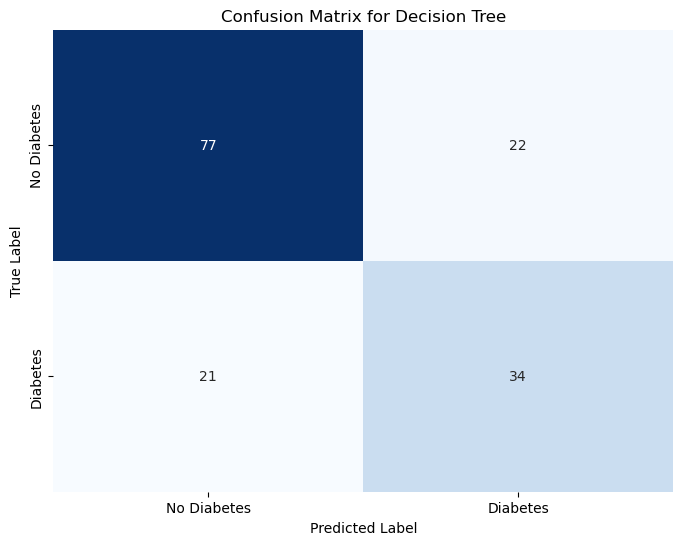

In [11]:
# Compute confusion matrix
cm_dt = confusion_matrix(y_test, dt_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Decision Tree')
plt.show()


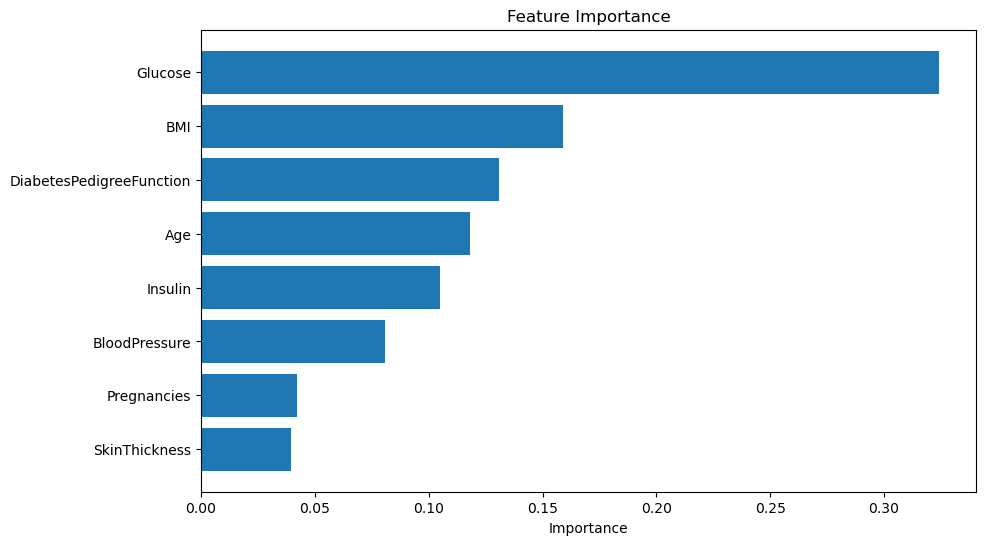

In [12]:
# Plot feature importance
importances = dt_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance')
plt.barh(range(X.shape[1]), importances[indices], align='center')
plt.yticks(range(X.shape[1]), [column_names[i] for i in indices])
plt.xlabel('Importance')
plt.show()


In [13]:
# Initialize and train the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate the model
rf_accuracy = accuracy_score(y_test, rf_pred)
print(f"Random Forest Accuracy: {rf_accuracy * 100:.2f}%")
print("\nClassification Report for Random Forest:")
print(classification_report(y_test, rf_pred))


Random Forest Accuracy: 75.32%

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81        99
           1       0.65      0.65      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



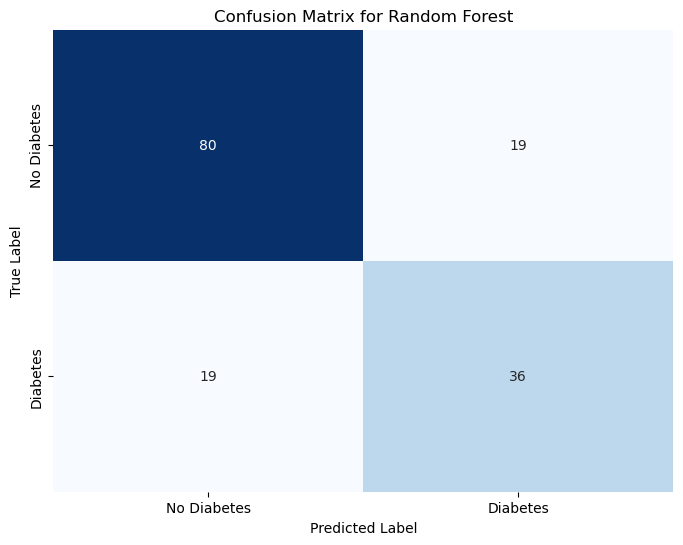

In [14]:
# Compute confusion matrix
cm_rf = confusion_matrix(y_test, rf_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for Random Forest')
plt.show()


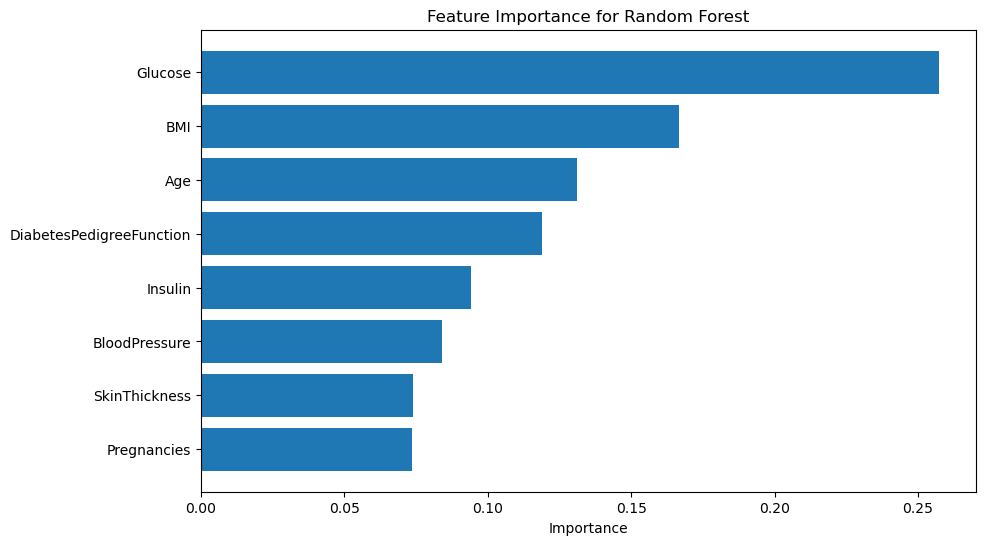

In [15]:
# Plot feature importance
importances_rf = rf_model.feature_importances_
indices_rf = np.argsort(importances_rf)

plt.figure(figsize=(10, 6))
plt.title('Feature Importance for Random Forest')
plt.barh(range(X.shape[1]), importances_rf[indices_rf], align='center')
plt.yticks(range(X.shape[1]), [column_names[i] for i in indices_rf])
plt.xlabel('Importance')
plt.show()


In [19]:
# Initialize and train the SVM model
svm_model = SVC(probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions
svm_pred = svm_model.predict(X_test)

# Evaluate the model
svm_accuracy = accuracy_score(y_test, svm_pred)
print(f"SVM Accuracy: {svm_accuracy * 100:.2f}%")
print("\nClassification Report for SVM:")
print(classification_report(y_test, svm_pred))


SVM Accuracy: 75.32%

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.79      0.85      0.82        99
           1       0.68      0.58      0.63        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.72       154
weighted avg       0.75      0.75      0.75       154



In [20]:
# Compute ROC curve for SVM
fpr_svm, tpr_svm, _ = roc_curve(y_test, svm_model.predict_proba(X_test)[:,1])
roc_auc_svm = auc(fpr_svm, tpr_svm)


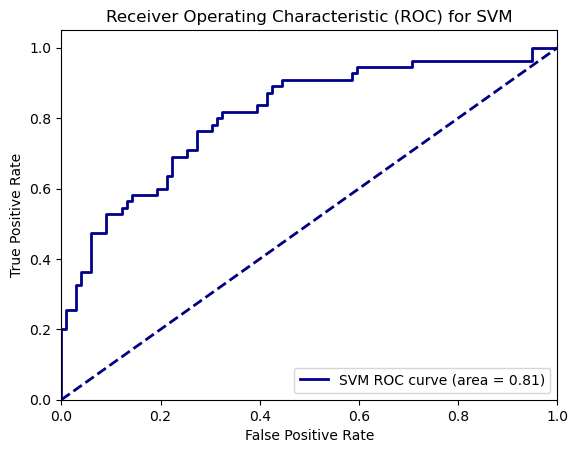

In [21]:
# Plot ROC curve
plt.figure()
plt.plot(fpr_svm, tpr_svm, color='darkblue', lw=2, label=f'SVM ROC curve (area = {roc_auc_svm:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) for SVM')
plt.legend(loc='lower right')
plt.show()


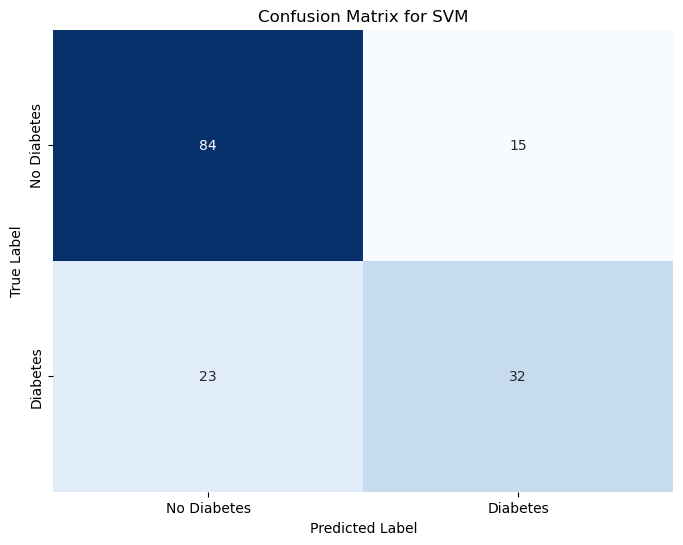

In [22]:
# Compute confusion matrix
cm_svm = confusion_matrix(y_test, svm_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['No Diabetes', 'Diabetes'], yticklabels=['No Diabetes', 'Diabetes'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for SVM')
plt.show()
